In [19]:
import torch

from svpg.utils.utils import load_algo_data
from svpg.visu.state_visitation import plot_state_visitation

import matplotlib.pyplot as plt
from omegaconf import OmegaConf

plt.style.use("fivethirtyeight")

In [15]:
plt.style.use("fivethirtyeight")

env_name = "MyCartPole-v0"
algo_names = ["A2C-independant", "A2C-SVPG", "A2C-SVPG_annealed"]

config = OmegaConf.create({
    "algorithm": {
        "seed": 4,
        "n_evals": 100,
    },
    "gym_env": {
        "classname": "svpg.agents.env.make_gym_env",
        "env_name": env_name
    }
})

In [32]:
def plot_algos_perf(directory, algo_names, env_name, mode="mean"):
    plt.figure(figsize=(9,6))
    for algo_name in algo_names:
        _, _, rewards, timesteps = load_algo_data(directory + algo_name)
        if mode == "best":
            best = rewards.sum(axis=1).argmax()
            rewards = rewards[best]
        else:
            rewards = rewards.mean(axis=0)
        plt.plot(timesteps, rewards, linewidth=2, label=algo_name)
        
    plt.legend()
    plt.title(env_name)

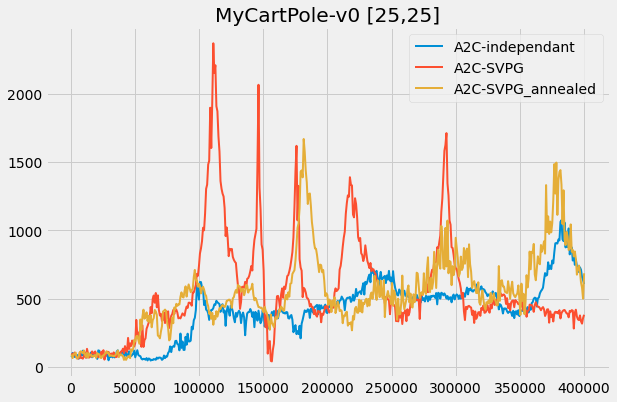

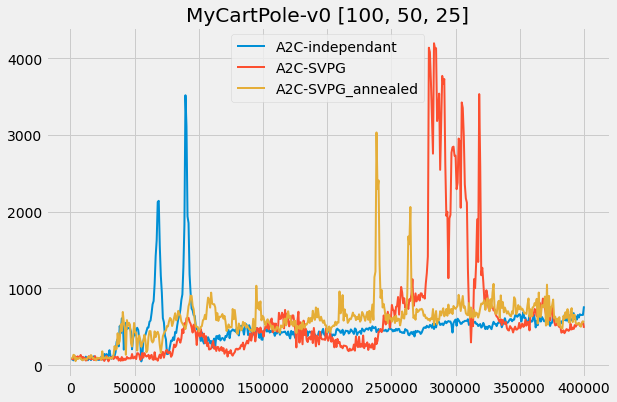

In [21]:
env_name = "MyCartPole-v0"

plot_algos_perf(
    f"../runs/{env_name}/22-05-08/14-23-23/", algo_names, env_name + " [25,25]"
)

plot_algos_perf(
    f"../runs/{env_name}/22-05-08/14-53-14/", algo_names, env_name + " [100, 50, 25]"
)


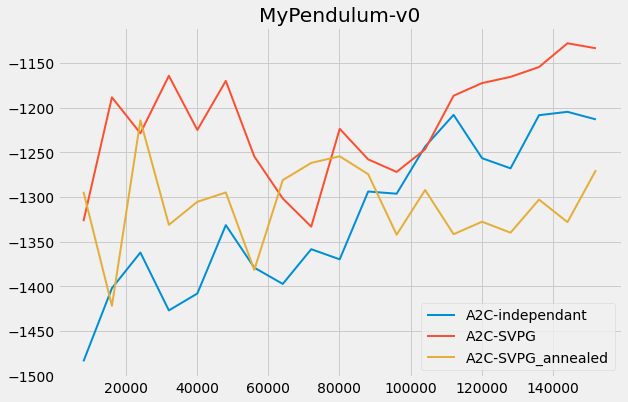

In [22]:
env_name = "MyPendulum-v0"
plot_algos_perf(f"../runs/{env_name}/22-05-07/21-29-40/", algo_names, env_name)

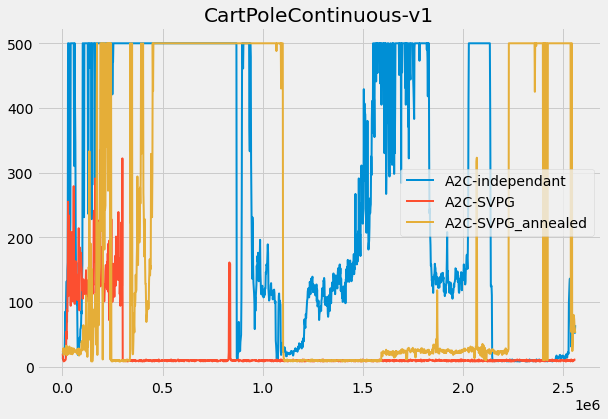

In [23]:
env_name = "CartPoleContinuous-v1"
plot_algos_perf(f"../runs/{env_name}/22-05-09/00-34-19/", algo_names, env_name)

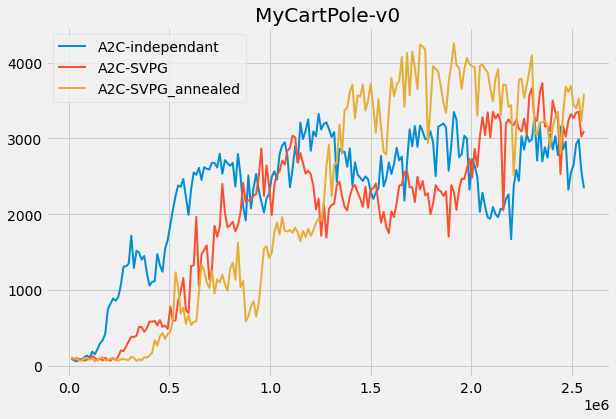

In [33]:
env_name = "MyCartPole-v0"
plot_algos_perf(f"../runs/{env_name}/22-05-09/10-34-00/", algo_names, env_name)

<Figure size 648x432 with 0 Axes>

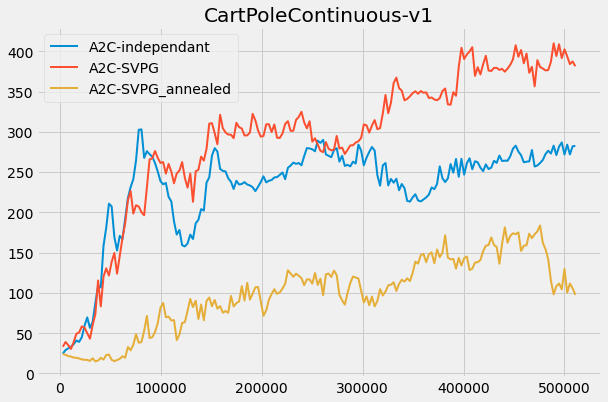

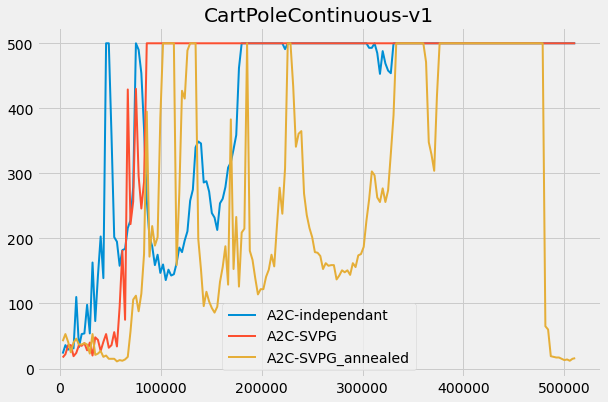

In [35]:
env_name = "CartPoleContinuous-v1"
plt.style.use("fivethirtyeight")
plt.figure(figsize=(9,6))
plot_algos_perf(f"../runs/{env_name}/22-05-09/17-00-00/", algo_names, env_name)
plot_algos_perf(f"../runs/{env_name}/22-05-09/17-00-00/", algo_names, env_name, mode="best")

In [ ]:
plot_state_visitation(
    config, a2c_agents, a2c_rewards, "A2C", cmap="Blues", save=False
)


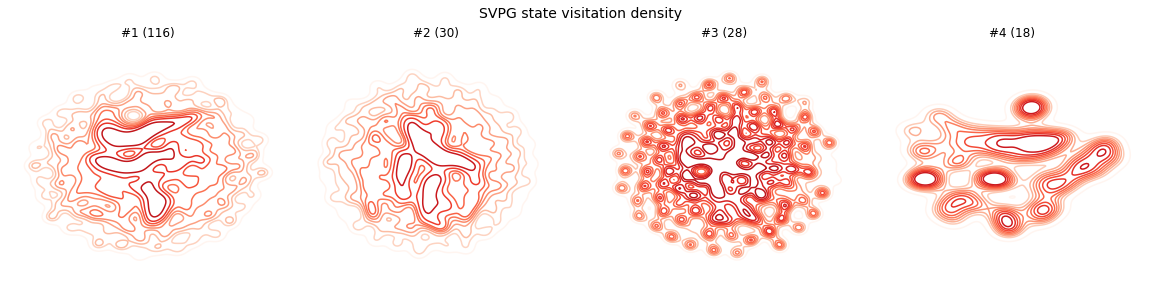

In [6]:
plot_state_visitation(config, svpg_agents, svpg_rewards, "SVPG", cmap="Reds", save=False)


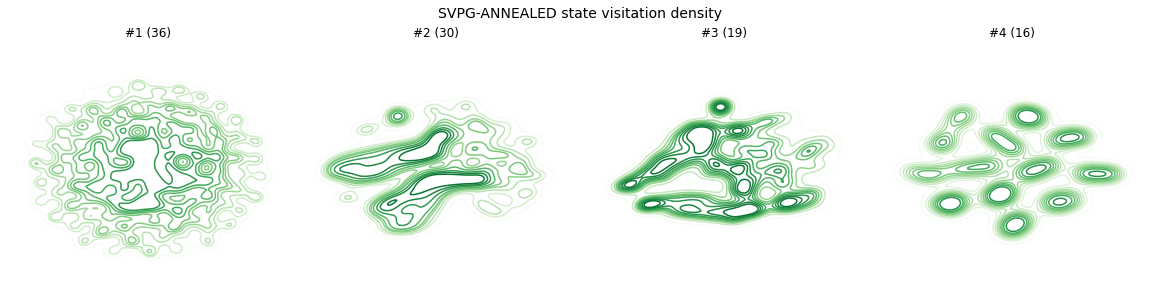

In [7]:
plot_state_visitation(config, svpga_agents, svpga_rewards, "SVPG-ANNEALED", cmap="Greens", save=False)
